## 1. Automatic Feature Seection

### There are 3 most basic strategies : 
* Univariate Statistics
* Model_based selection
* Iterative selection

All of these are supervised methods, meaning they need the **target** for fitting the model.This means we need to split the data into training and test sets, and fit the feature selection only on the training part of the data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## i. Univariate statistics

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()

#get deterministic random numbers

rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data), 50))

# Add noise features to the data
# the first 30 features are from the data, the next 50 are noise

x_w_noise=np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test=train_test_split(x_w_noise, cancer.target, random_state=0, test_size=0.5)

#use f_classif (the default) and SelectPercentile to select 50% of the features

select=SelectPercentile(percentile=50)
select.fit(X_train, y_train)

#transform training set

x_train_selected=select.transform(X_train)

print("x_train.shape: {}".format(X_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))

x_train.shape: (284, 80)
x_train_selected.shape: (284, 40)


As you can see, the number of features were reduced from 80 to 40(50% of the original number of features). 

Let's find out which features were selected using the **get_support** method, which returns a Boolean mask of the selected features

([], [])

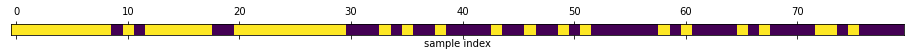

In [26]:
mask=select.get_support()

#visualize the mask--black is True, white is False

plt.matshow(mask.reshape(1, -1), cmap='viridis')
plt.xlabel('sample index')
plt.yticks(())

In [27]:
# Let's compare the performance of logistic regression on all features against 
# the performance using only the selected features:

from sklearn.linear_model import LogisticRegression

#transform test data
x_test_selected=select.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train, y_train)
print("score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(x_train_selected, y_train)
print("score with only selected features: {:.3f}".format(lr.score(x_test_selected, y_test)))

score with all features: 0.919
score with only selected features: 0.916


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

## ii. Model_based feature selection

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0, test_size=0.5)


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select=SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

# Let's fit the model

select.fit(X_train, y_train)
x_train_l1=select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("x_train_l1.shape: {}".format(x_train_l1.shape))

X_train.shape: (284, 30)
x_train_l1.shape: (284, 15)


([], [])

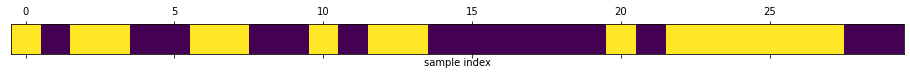

In [21]:
# Again, let's have a look at the features that were selected

mask=select.get_support()

#visualize the mask--black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='viridis')
plt.xlabel('sample index')
plt.yticks(())

In [19]:
# Let's look at the performance
from sklearn.linear_model import LogisticRegression
x_test_l1=select.transform(X_test)
score=LogisticRegression().fit(x_train_l1, y_train).score(x_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.958


# iii. Iterative Feature Selection

Here a series of models are built with varying numbers of features. There are two basic methods: Starting with no features and adding features one by one untill some stopping creterion is reached. Or starting with all features and removing features one by one untill some stopping creterion is reached.
Because a series of models are built, these methods are much more expensive than the methods we discussed previously.

One particular method of this kind is Recursive Feature Elimination(RFE).

Running this code takes significantly longer than that for model_based_selection , because a random forest model is trained 40 times , one for each feature that is dropped.

([], [])

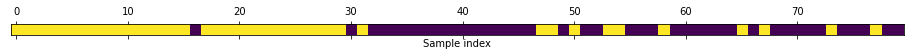

In [28]:
from sklearn. feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

#visualize the selected features:
mask=select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="viridis")
plt.xlabel("Sample index")
plt.yticks(())

In [30]:
x_train_rfe=select.transform(X_train)
x_test_rfe=select.transform(X_test)
score=LogisticRegression().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Big up to Andreas C.Muller & Sarah Guido*

*Reference book*: **Introduction to Machine Learning with Python** 